In [52]:
import pandas as pd

In [53]:
df_autos= pd.read_pickle('/Users/pkc/PycharmProjects/pythonProject/Automotive/pickles/df_join_lists.pickle')

In [54]:
df_autos.tail()

,mileage,make,model,fuel,gear,offerType,price,hp,year,country,yrsOld
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,Italy,0
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,Italy,0
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,Italy,0
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,Italy,0
46404,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021,Italy,0


how to find yr over yr depreciation for dataset:
1. Identify top 5 or 10 most popular brand model (will give you the most sample space)
2. topXList = df.model.value_counts().head(X).index.tolist()
3. df_top_X_model= df[df.model.isin(topXList)].copy()
4.

In [55]:
df_autos.model.value_counts().head()

model
Golf      1492
Corsa     1491
Fiesta    1289
Astra     1191
Focus      985
Name: count, dtype: int64

In [56]:
top5List= df_autos.model.value_counts().head().index.tolist()

In [57]:
top5List

['Golf', 'Corsa', 'Fiesta', 'Astra', 'Focus']

In [58]:
df_top_5_models= df_autos[df_autos.model.isin(top5List)].copy()

In [85]:
df_top_5_models

,mileage,make,model,fuel,gear,offerType,price,hp,year,country,yrsOld
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011,Germany,10
11,84000,Volkswagen,Golf,Gasoline,Manual,Used,6990,105.0,2011,Germany,10
19,82000,Opel,Corsa,Gasoline,Manual,Used,7000,101.0,2011,Germany,10
21,81970,Volkswagen,Golf,Gasoline,Manual,Used,7850,105.0,2012,Germany,9
27,104250,Opel,Astra,Gasoline,Manual,Used,7950,140.0,2012,Germany,9
...,...,...,...,...,...,...,...,...,...,...,...
46266,10,Opel,Corsa,Electric,Automatic,Used,28850,136.0,2021,Germany,0
46281,2000,Ford,Fiesta,Gasoline,Manual,Demonstration,18990,95.0,2021,United States,0
46282,1570,Ford,Focus,Gasoline,Automatic,Demonstration,26990,150.0,2021,United States,0
46312,10,Opel,Corsa,Electric,Automatic,Used,29440,136.0,2021,Germany,0


In [104]:
series = round(df_top_5_models.groupby(['model','yrsOld']).price.mean())

In [111]:
df_series= series.to_frame()

<Axes: xlabel='model,yrsOld'>

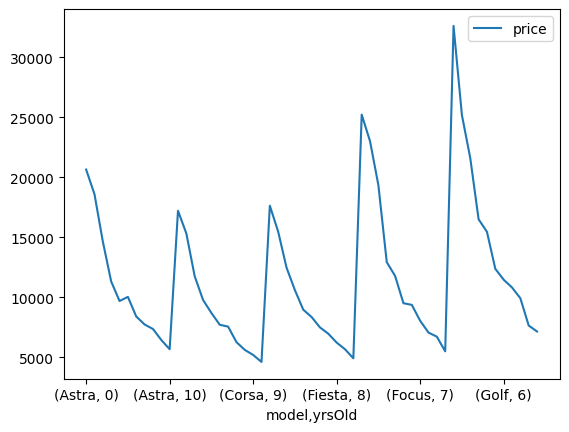

In [116]:
df_series.plot()

In [60]:
df_autos.sort_values(by='price').head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,country,yrsOld
23464,204000,Citroen,C1,Gasoline,Manual,Used,1100,68.0,2011,France,10
17155,100611,Lada,Priora,Gasoline,Manual,Used,1190,98.0,2011,Russia,10
23487,153000,Toyota,Aygo,Gasoline,Manual,Used,1250,68.0,2012,Japan,9
17811,222000,Peugeot,206,Diesel,Manual,Used,1299,68.0,2011,France,10
24365,133000,Opel,Corsa,Gasoline,Manual,Used,1300,69.0,2012,Germany,9


In [61]:
df_autos.sort_values(by='price',ascending=False).head()

,mileage,make,model,fuel,gear,offerType,price,hp,year,country,yrsOld
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017,Italy,4
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019,Germany,2
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019,undetermined,2
16429,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530.0,2018,undetermined,3
29257,350,Mercedes-Benz,SLS,Gasoline,Automatic,Used,465000,591.0,2015,Germany,6


In [62]:
df_autos[df_autos.price<3.5*10**4].shape

(42592, 11)

In [63]:
df_autos.price.median()

10999.0

In [64]:
df_autos[df_autos.price < 8 * 10 ** 4].shape

(45913, 11)

In [65]:
df_autos.shape

(46405, 11)

In [66]:
df_autos[df_autos.price <8 * 10 ** 4].describe()

,mileage,price,year,yrsOld
count,4.591300e+04,45913.000000,45913.000000,45913.000000
mean,7.175356e+04,15299.327925,2015.980528,5.019472
std,6.266796e+04,11945.991911,3.147125,3.147125
min,0.000000e+00,1100.000000,2011.000000,0.000000
25%,2.035000e+04,7490.000000,2013.000000,2.000000
50%,6.061400e+04,10990.000000,2016.000000,5.000000
75%,1.058770e+05,18980.000000,2019.000000,8.000000
max,1.111111e+06,79999.000000,2021.000000,10.000000


In [67]:
df_autos[(df_autos.price <8 * 10 ** 4) & (df_autos.price >4.5 * 10 ** 4)].describe()


,mileage,price,year,yrsOld
count,1482.000000,1482.000000,1482.000000,1482.000000
mean,25317.961538,57690.561404,2019.157220,1.842780
std,28735.661934,9876.388724,1.802236,1.802236
min,0.000000,45180.000000,2011.000000,0.000000
25%,4900.000000,48996.000000,2018.000000,0.000000
50%,14900.000000,54999.000000,2020.000000,1.000000
75%,36402.500000,64900.000000,2021.000000,3.000000
max,220000.000000,79999.000000,2021.000000,10.000000


In [68]:
round(df_autos[df_autos.price >8 * 10 ** 4].describe())

,mileage,price,year,yrsOld
count,492.0,492.0,492.0,492.0
mean,17454.0,135368.0,2019.0,2.0
std,22521.0,87086.0,2.0,2.0
min,1.0,80990.0,2011.0,0.0
25%,3038.0,92792.0,2018.0,0.0
50%,9900.0,109900.0,2020.0,1.0
75%,22834.0,142048.0,2021.0,3.0
max,199789.0,1199900.0,2021.0,10.0


In [69]:
df_autos[df_autos.price < 4.5 * 10 ** 4].describe()

,mileage,price,year,yrsOld
count,4.442900e+04,44429.000000,44429.000000,44429.000000
mean,7.330012e+04,13883.963875,2015.874586,5.125414
std,6.289922e+04,9068.360996,3.127153,3.127153
min,0.000000e+00,1100.000000,2011.000000,0.000000
25%,2.200000e+04,7399.000000,2013.000000,2.000000
50%,6.283100e+04,10880.000000,2016.000000,5.000000
75%,1.077500e+05,17840.000000,2019.000000,8.000000
max,1.111111e+06,44999.000000,2021.000000,10.000000


In [70]:
df_autos[df_autos.price < 4.5 * 10 ** 4].describe()

,mileage,price,year,yrsOld
count,4.442900e+04,44429.000000,44429.000000,44429.000000
mean,7.330012e+04,13883.963875,2015.874586,5.125414
std,6.289922e+04,9068.360996,3.127153,3.127153
min,0.000000e+00,1100.000000,2011.000000,0.000000
25%,2.200000e+04,7399.000000,2013.000000,2.000000
50%,6.283100e+04,10880.000000,2016.000000,5.000000
75%,1.077500e+05,17840.000000,2019.000000,8.000000
max,1.111111e+06,44999.000000,2021.000000,10.000000


In [71]:
df_autos[df_autos.price<7500].describe()

,mileage,price,year,yrsOld
count,11736.000000,11736.000000,11736.000000,11736.000000
mean,109749.139826,5741.823620,2013.120825,7.879175
std,63034.656405,1242.010099,1.864308,1.864308
min,0.000000,1100.000000,2011.000000,1.000000
25%,66773.500000,4950.000000,2012.000000,7.000000
50%,97943.500000,5990.000000,2013.000000,8.000000
75%,140054.500000,6800.000000,2014.000000,9.000000
max,999999.000000,7499.000000,2020.000000,10.000000


<Axes: >

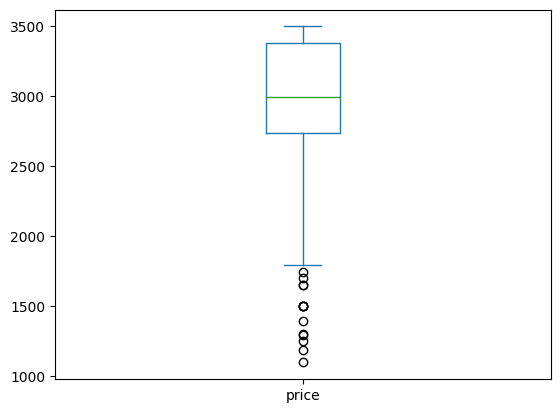

In [72]:
df_autos[df_autos.price < 3500].price.plot(kind='box')

<Axes: ylabel='Frequency'>

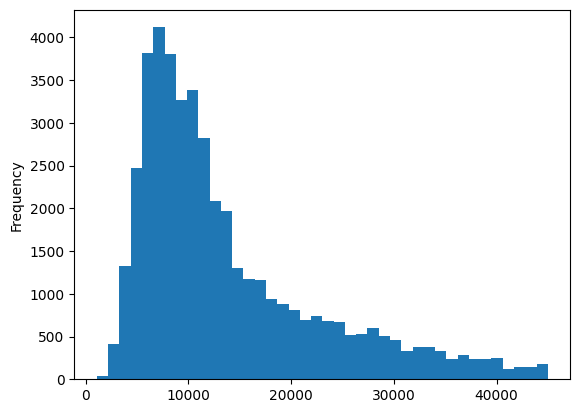

In [73]:
df_autos[df_autos.price<45000].price.plot(kind='hist',bins=40)

In [74]:
df_autos[df_autos.price<30500].shape

(41152, 11)

In [75]:
df_autos[(df_autos.price>=30500)&(df_autos.price<80000)].shape

(4761, 11)

In [76]:
#df_luxury= df_autos[df_autos.price>=8*10**4].copy().reset_index()

In [77]:
#df_luxury.groupby('make').price.mean()

In [78]:
#df_luxury.hp.mean()

In [79]:
#df_luxury.make.value_counts().head(10)

In [80]:
#top_lux_10= df_luxury.make.value_counts().head(10).index.tolist()

In [81]:
#top_lux_10

In [82]:
#round(df_luxury[df_luxury.make.isin(top_lux_10)].groupby('make').price.mean())

the price correlation. How is price correlated with a) mileage or b)horsepower? Also, can